<a href="https://colab.research.google.com/github/Sanghita-C/Breast_Cancer_Survival_Prediction/blob/main/breast_cancer_survuval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [45]:
#Loading the dataset:
data = pd.read_csv('Breast_Cancer_dataset.csv')
data.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4.0,Positive,Positive,24.0,1,60,Alive
1,50.0,White,NaN,T2,N2,IIIA,Moderately differentiated,2,Regional,35.0,Positive,Positive,14.0,5,62,Alive
2,58.0,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63.0,Positive,Positive,14.0,7,75,Alive
3,58.0,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,NaN,Positive,Positive,2.0,1,84,Alive
4,47.0,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41.0,NaN,Positive,3.0,1,50,Alive


In [46]:
rows, columns = data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 4024
Number of columns: 16


In [47]:
# 1. Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Age                       201
Race                      402
Marital Status            321
T Stage                     0
N Stage                     0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                402
Estrogen Status           201
Progesterone Status         0
Regional Node Examined    603
Reginol Node Positive       0
Survival Months             0
Status                      0
dtype: int64


In [48]:
#Handling missing values PART 1:
# Fill missing values for 'Age' with the mean
if 'Age' in data.columns:
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    print(f"Filled missing values in 'Age' with the mean: {data['Age'].mean()}")

# Fill missing values for 'Race' with the mode
if 'Race' in data.columns:
    data['Race'].fillna(data['Race'].mode()[0], inplace=True)
    print(f"Filled missing values in 'Race' with the mode: {data['Race'].mode()[0]}")

# Fill missing values for 'Marital Status' with the mode
if 'Marital Status' in data.columns:
    data['Marital Status'].fillna(data['Marital Status'].mode()[0], inplace=True)
    print(f"Filled missing values in 'Marital Status' with the mode: {data['Marital Status'].mode()[0]}")

# Display missing values after filling to confirm
print("\nMissing values per column after handling:\n", data.isnull().sum())


Filled missing values in 'Age' with the mean: 53.93146743395239
Filled missing values in 'Race' with the mode: White
Filled missing values in 'Marital Status' with the mode: Married

Missing values per column after handling:
 Age                         0
Race                        0
Marital Status              0
T Stage                     0
N Stage                     0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                402
Estrogen Status           201
Progesterone Status         0
Regional Node Examined    603
Reginol Node Positive       0
Survival Months             0
Status                      0
dtype: int64


<ipython-input-48-2e7ba2c8cae4>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-48-2e7ba2c8cae4>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

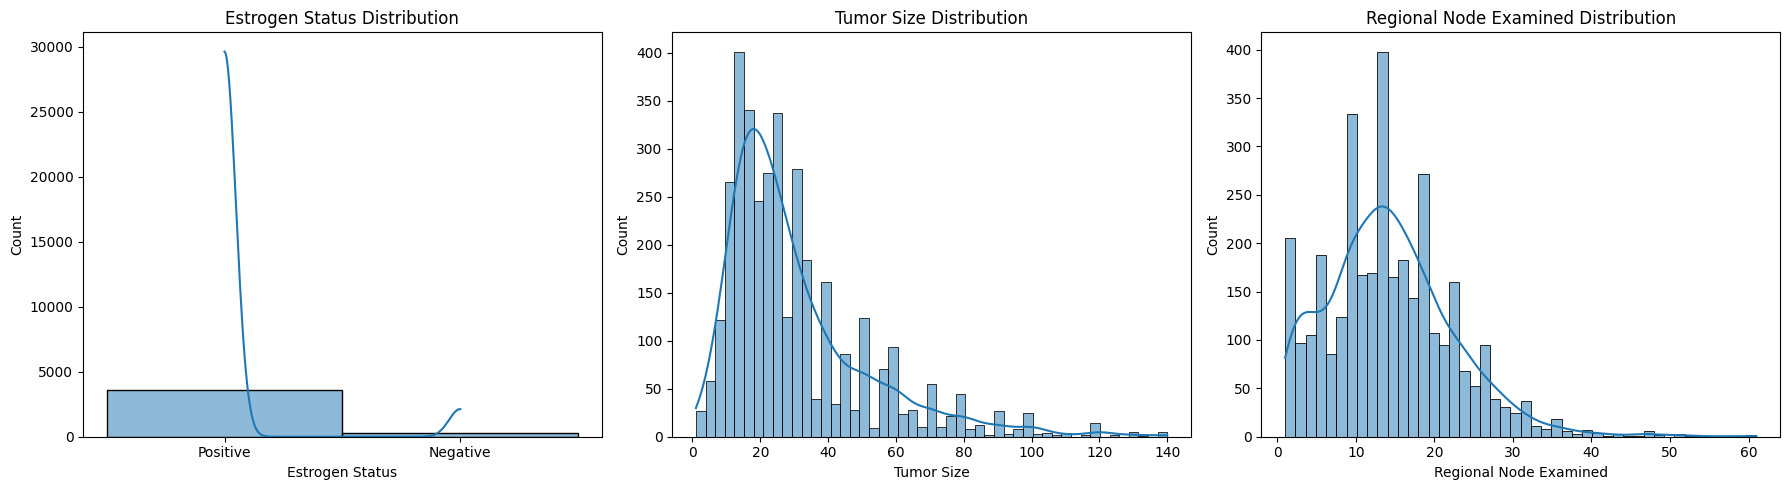

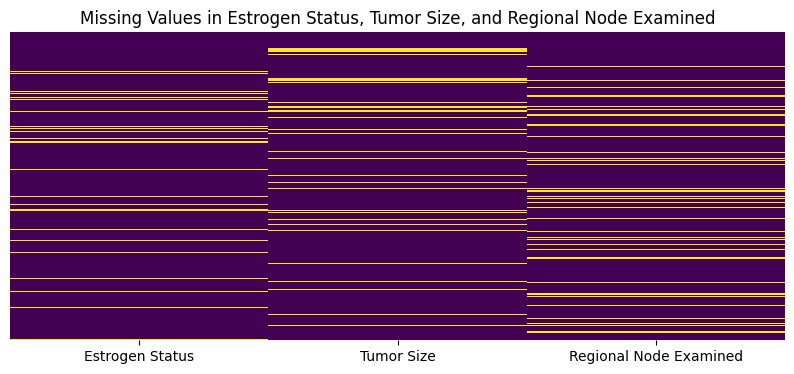

In [49]:

# 1. Histogram of Estrogen Status, Tumor Size, and Regional Node Examined
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Estrogen Status distribution
sns.histplot(data['Estrogen Status'], kde=True, ax=axs[0])
axs[0].set_title("Estrogen Status Distribution")
axs[0].set_xlabel("Estrogen Status")

# Tumor Size distribution
sns.histplot(data['Tumor Size'], kde=True, ax=axs[1])
axs[1].set_title("Tumor Size Distribution")
axs[1].set_xlabel("Tumor Size")

# Regional Node Examined distribution
sns.histplot(data['Regional Node Examined'], kde=True, ax=axs[2])
axs[2].set_title("Regional Node Examined Distribution")
axs[2].set_xlabel("Regional Node Examined")

plt.tight_layout()
plt.show()

# 2. Visualize missing values in these columns
plt.figure(figsize=(10, 4))
sns.heatmap(data[['Estrogen Status', 'Tumor Size', 'Regional Node Examined']].isnull(),
            cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values in Estrogen Status, Tumor Size, and Regional Node Examined")
plt.show()

We can see that the missing values are not clustered and fairly distributed throughout the dataset. So there aren't any patterns as such. We will go with positive value for estrogen status.

In [50]:
if 'Age' in data.columns:
    data['Estrogen Status'].fillna('Positive', inplace=True)


<ipython-input-50-0c31a7b6b1a4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Estrogen Status'].fillna('Positive', inplace=True)


In [51]:
# Display missing values after dropping to confirm
print("\nMissing values per column after dropping rows:\n", data.isnull().sum())
print(f"\nNew dataset shape after dropping rows: {data.shape}")


Missing values per column after dropping rows:
 Age                         0
Race                        0
Marital Status              0
T Stage                     0
N Stage                     0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                402
Estrogen Status             0
Progesterone Status         0
Regional Node Examined    603
Reginol Node Positive       0
Survival Months             0
Status                      0
dtype: int64

New dataset shape after dropping rows: (4024, 16)


# **Observation for tumor size and regional node examined**

**Tumor Size:**
The distribution is right-skewed, with a majority of values between 0 and 40, and a long tail extending to larger sizes.
This skewness suggests that filling missing values with the mean may not be appropriate, as it could bias the imputed values upwards.


**Regional Node Examined:**
This distribution also appears skewed but has distinct peaks (possibly due to specific medical practices or reporting standards).
Like Tumor Size, a simple mean imputation might not be ideal.

Hence , we are planning to do ***predictive imputation*** on these two columns since the tumor size can be a big predictive feature.




In [52]:
# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

In [53]:
def predictive_imputation(data, target_column):
    # Separate rows where target_column is missing and where it's not missing
    missing_data = data[data[target_column].isnull()]
    non_missing_data = data[data[target_column].notnull()]

    # Separate features and target for training
    X = non_missing_data.drop(columns=[target_column])
    y = non_missing_data[target_column]

    # Drop columns that might still contain missing values to avoid complications
    X = X.dropna(axis=1)
    missing_X = missing_data[X.columns]  # Use the same columns for the missing data

    # Train a Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)

    # Predict missing values
    predicted_values = model.predict(missing_X)

    # Fill missing values with predictions
    data.loc[data[target_column].isnull(), target_column] = predicted_values
    print(f"Completed predictive imputation for '{target_column}'")

In [54]:
# Apply predictive imputation for 'Tumor Size' and 'Regional Node Examined'
predictive_imputation(data_encoded, 'Tumor Size')
predictive_imputation(data_encoded, 'Regional Node Examined')

# Map the imputed values back to the original dataset
data['Tumor Size'] = data_encoded['Tumor Size']
data['Regional Node Examined'] = data_encoded['Regional Node Examined']

# Check to ensure no missing values remain in the target columns
print("\nMissing values after imputation:\n", data[['Tumor Size', 'Regional Node Examined']].isnull().sum())

Completed predictive imputation for 'Tumor Size'
Completed predictive imputation for 'Regional Node Examined'

Missing values after imputation:
 Tumor Size                0
Regional Node Examined    0
dtype: int64


In [55]:
# 2. Outlier Detection - using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).sum(axis=0)
print("\nOutliers per column:\n", outliers)



Outliers per column:
 Age                         0
Tumor Size                 77
Regional Node Examined     40
Reginol Node Positive     101
Survival Months             4
dtype: int64


We can ignore the survival month outliers. But let's visualize the outlier for tumor size, Reginol node examined and reginol node positive.

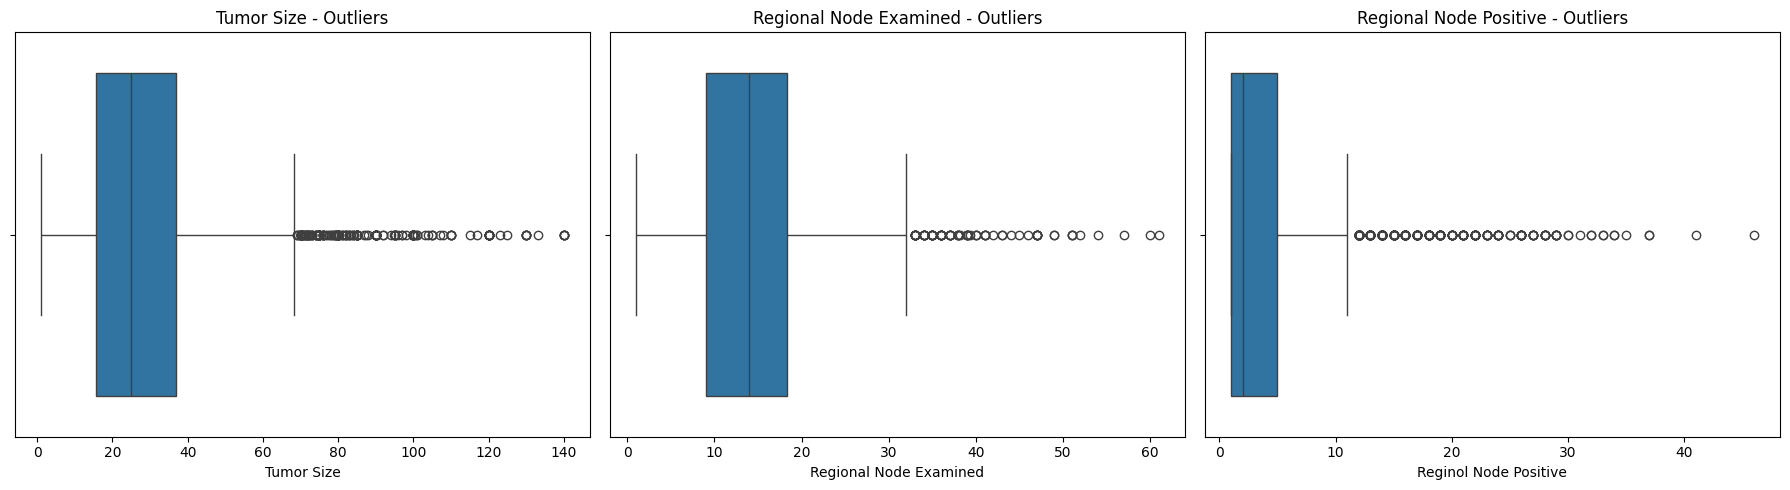

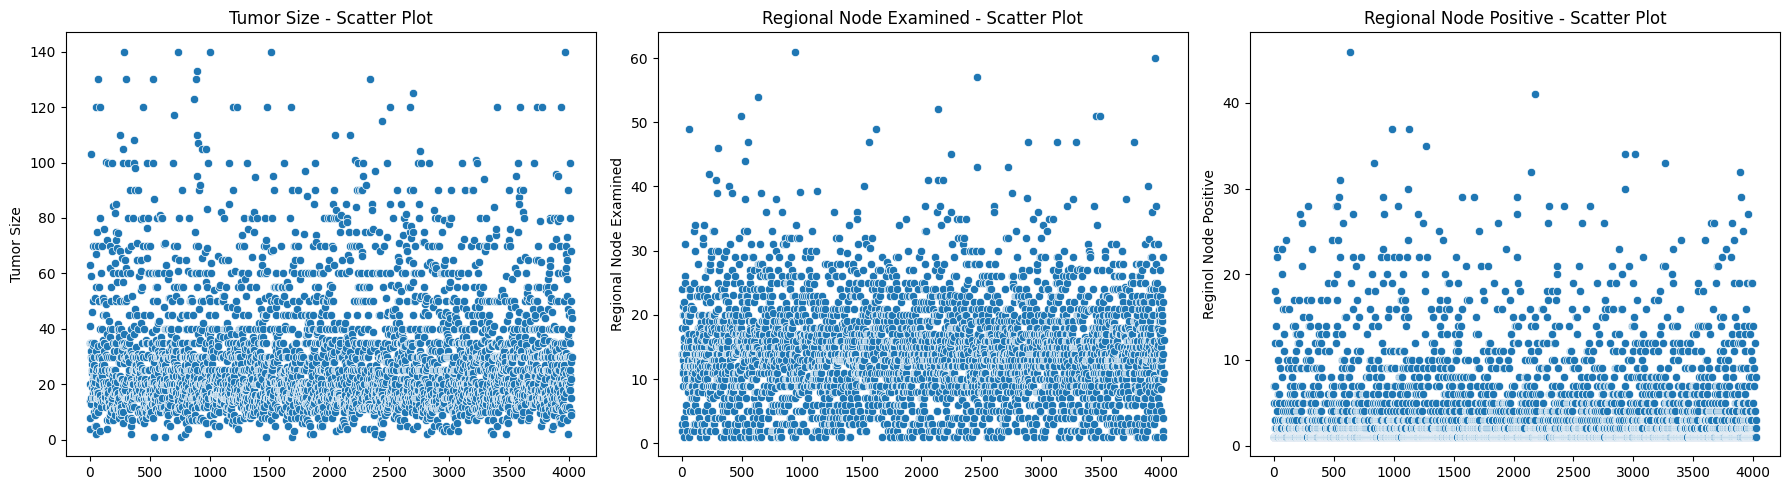

In [56]:

# Setting up the plotting area for box plots
plt.figure(figsize=(18, 5))

# 1. Box plot for Tumor Size
plt.subplot(1, 3, 1)
sns.boxplot(x=data['Tumor Size'])
plt.title("Tumor Size - Outliers")

# 2. Box plot for Regional Node Examined
plt.subplot(1, 3, 2)
sns.boxplot(x=data['Regional Node Examined'])
plt.title("Regional Node Examined - Outliers")

# 3. Box plot for Regional Node Positive
plt.subplot(1, 3, 3)
sns.boxplot(x=data['Reginol Node Positive'])
plt.title("Regional Node Positive - Outliers")

plt.tight_layout()
plt.show()

# Scatter plots for additional context
plt.figure(figsize=(18, 5))

# 1. Scatter plot for Tumor Size
plt.subplot(1, 3, 1)
sns.scatterplot(x=range(len(data)), y=data['Tumor Size'])
plt.title("Tumor Size - Scatter Plot")

# 2. Scatter plot for Regional Node Examined
plt.subplot(1, 3, 2)
sns.scatterplot(x=range(len(data)), y=data['Regional Node Examined'])
plt.title("Regional Node Examined - Scatter Plot")

# 3. Scatter plot for Regional Node Positive
plt.subplot(1, 3, 3)
sns.scatterplot(x=range(len(data)), y=data['Reginol Node Positive'])
plt.title("Regional Node Positive - Scatter Plot")

plt.tight_layout()
plt.show()


Let's try to visualize wrt to survival status.

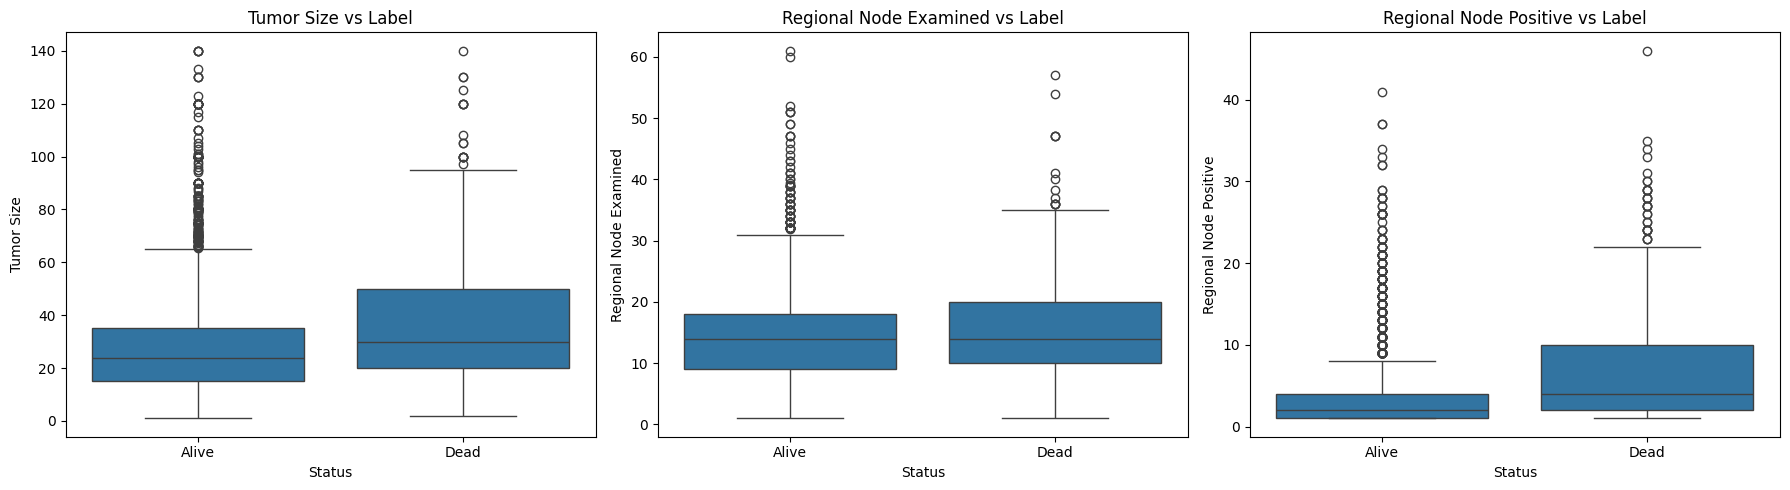

In [57]:
# Replace 'Label' with the actual name of your label column
label_column = 'Status'  # Adjust this to your dataset's label column name

# Setting up the plotting area for box plots by label
plt.figure(figsize=(18, 5))

# 1. Tumor Size vs Label
plt.subplot(1, 3, 1)
sns.boxplot(x=data[label_column], y=data['Tumor Size'])
plt.title("Tumor Size vs Label")
plt.xlabel(label_column)
plt.ylabel("Tumor Size")

# 2. Regional Node Examined vs Label
plt.subplot(1, 3, 2)
sns.boxplot(x=data[label_column], y=data['Regional Node Examined'])
plt.title("Regional Node Examined vs Label")
plt.xlabel(label_column)
plt.ylabel("Regional Node Examined")

# 3. Regional Node Positive vs Label
plt.subplot(1, 3, 3)
sns.boxplot(x=data[label_column], y=data['Reginol Node Positive'])
plt.title("Regional Node Positive vs Label")
plt.xlabel(label_column)
plt.ylabel("Regional Node Positive")

plt.tight_layout()
plt.show()

In [58]:
# Handling outliers

# Define capping thresholds based on the 99th percentile or specific values
tumor_size_cap = data['Tumor Size'].quantile(0.99)
regional_node_examined_cap = 40  # Capping based on observation
regional_node_positive_cap = data['Reginol Node Positive'].quantile(0.99)

# Apply capping
data['Tumor Size'] = data['Tumor Size'].apply(lambda x: min(x, tumor_size_cap))
data['Regional Node Examined'] = data['Regional Node Examined'].apply(lambda x: min(x, regional_node_examined_cap))
data['Reginol Node Positive'] = data['Reginol Node Positive'].apply(lambda x: min(x, regional_node_positive_cap))

# Display the capping thresholds for verification
print(f"Capping Thresholds:\nTumor Size Cap: {tumor_size_cap}\nRegional Node Examined Cap: {regional_node_examined_cap}\nRegional Node Positive Cap: {regional_node_positive_cap}")

# Verify that outliers have been capped
print("\nValues after capping:\n")
print(data[['Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']].describe())


Capping Thresholds:
Tumor Size Cap: 101.0
Regional Node Examined Cap: 40
Regional Node Positive Cap: 26.0

Values after capping:

        Tumor Size  Regional Node Examined  Reginol Node Positive
count  4024.000000             4024.000000            4024.000000
mean     30.324842               14.405695               4.118539
std      20.423355                7.532197               4.902187
min       1.000000                1.000000               1.000000
25%      15.695000                9.000000               1.000000
50%      25.000000               14.000000               2.000000
75%      37.000000               18.367500               5.000000
max     101.000000               40.000000              26.000000


In [59]:
# Define the column for which to remove outliers
survival_column = 'Survival Months'  # Adjust the column name as necessary

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Survival Months
Q1 = data[survival_column].quantile(0.25)
Q3 = data[survival_column].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that are outside the bounds
data_no_outliers = data[(data[survival_column] >= lower_bound) & (data[survival_column] <= upper_bound)]

# Display the number of rows dropped
rows_dropped = len(data) - len(data_no_outliers)
print(f"Number of rows dropped due to outliers in {survival_column}: {rows_dropped}")

# Verify that no outliers remain in Survival Months
print(data_no_outliers[survival_column].describe())

Number of rows dropped due to outliers in Survival Months: 18
count    4006.000000
mean       71.603595
std        22.513586
min         5.000000
25%        56.000000
50%        73.000000
75%        90.000000
max       107.000000
Name: Survival Months, dtype: float64


In [60]:
data = data_no_outliers
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
non_numerical_columns = data.select_dtypes(exclude=[np.number]).columns
numerical_columns = data.select_dtypes(include=[np.number]).columns
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_columns)
final_data = pd.concat([scaled_data_df, data[non_numerical_columns].reset_index(drop=True)], axis=1)
final_data.head()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
0,1.610052,-1.287991,1.274258,-0.635361,-0.515468,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
1,-0.448031,0.228777,-0.054128,0.181080,-0.426622,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
2,0.466673,1.598761,-0.054128,0.589301,0.150879,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,Positive,Positive,Alive
3,0.466673,-0.800750,-1.648191,-0.635361,0.550688,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,Positive,Positive,Alive
4,-0.791045,0.522345,-1.515353,-0.635361,-0.959700,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,Positive,Positive,Alive


In [61]:
#checking indexing is fine and no missing values
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Alternatively, to check if there are any missing values in the entire dataset
has_missing = data.isnull().values.any()
print("\nAre there any missing values in the dataset?", has_missing)

# If you want to display the percentage of missing values in each column
missing_percentage = data.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percentage[missing_percentage > 0])


Columns with missing values:
Series([], dtype: int64)

Are there any missing values in the dataset? False

Percentage of missing values per column:
Series([], dtype: float64)


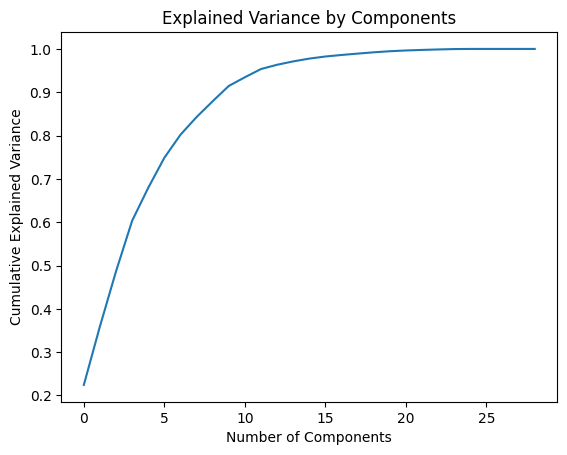


Data after dimensionality reduction:
           0         1         2         3         4         5         6  \
0 -0.254454  1.911715 -0.444652 -0.720691  0.650669 -1.565772 -0.777232   
1  0.333306 -0.492621 -0.197883 -0.094304  0.313690  0.667826 -0.181055   
2  1.301182 -0.129160 -0.268963  1.433342 -0.197991  0.774568  0.178375   
3 -1.682640  0.104544 -0.264851  0.267552 -1.388469 -0.783470 -0.492280   
4 -0.700303 -1.689081 -1.168815 -0.248123 -0.687509 -0.889558  0.784315   

          7         8         9 Status  
0  0.040460 -0.689145  0.027404  Alive  
1 -0.789143  0.529504  0.773718  Alive  
2  0.475868 -0.543332 -0.889747  Alive  
3 -0.087085 -0.610379  0.104024  Alive  
4 -0.102739 -0.266849  0.401174  Alive  


In [62]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define the label column
label_column = 'Status'  # Replace with your actual label column name

# Separate features and label
features = final_data.drop(columns=[label_column])
label = final_data[label_column]

# One-hot encode only the feature data
encoded_features = pd.get_dummies(features, drop_first=True)

# Apply PCA only to the encoded features
pca = PCA()
pca.fit(encoded_features)

# Plot explained variance to decide on the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

# Decide the number of components to retain (e.g., retaining 90% of variance)
pca = PCA(n_components=0.90)  # Adjust n_components if needed
reduced_data = pca.fit_transform(encoded_features)

# Convert reduced data to a DataFrame
PCA_data_df = pd.DataFrame(reduced_data)

# Optionally, add the label column back to the reduced dataset
PCA_data_df[label_column] = label.reset_index(drop=True)

print("\nData after dimensionality reduction:\n", PCA_data_df.head())


In [22]:
#Dimentionality Reduction using Feature Selection
## Ranking the features

# Separate features and target
label_column = 'Status'  # Replace with the actual name of your label column
X = final_data.drop(columns=[label_column])
y = final_data[label_column]

X_encoded = pd.get_dummies(X, drop_first=True)

# Train a linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_encoded, y)

# Get the coefficients (weights) from the linear SVM model
# The coefficients represent the importance of each feature
feature_weights = svm_model.coef_.flatten()  # Flatten to 1D if there's only one class boundary

# Calculate the absolute weights for ranking
abs_weights = np.abs(feature_weights)

# Create a DataFrame to store features and their absolute weights
feature_ranking_df = pd.DataFrame({
    "Feature": X_encoded.columns,
    "Weight": abs_weights
})

# Rank features by the absolute weight values in descending order
feature_ranking_df = feature_ranking_df.sort_values(by="Weight", ascending=False)

# Display the ranked features
print("Feature ranking based on absolute weights from linear SVM:")
print(feature_ranking_df)



Feature ranking based on absolute weights from linear SVM:
                                Feature    Weight
13                          T Stage _T4  0.833348
4                       Survival Months  0.821906
21       differentiate_Undifferentiated  0.747640
12                          T Stage _T3  0.420208
5                            Race_Other  0.369884
8              Marital Status_Separated  0.369574
24                              Grade_2  0.356030
27             Estrogen Status_Positive  0.352930
28         Progesterone Status_Positive  0.318948
23                              Grade_1  0.274731
22    differentiate_Well differentiated  0.274731
14                           N Stage_N2  0.220455
17                       6th Stage_IIIA  0.217009
3                 Reginol Node Positive  0.215879
6                            Race_White  0.208083
26                     A Stage_Regional  0.203365
11                          T Stage _T2  0.176113
18                       6th Stage_IIIB  

Just because individual features have high predictive power doesn’t necessarily mean that they will perform optimally together. In fact, combining certain features may lead to redundancy or introduce interactions that aren’t beneficial. Let's do some standardization.Post that we will do forward feature selection with cross validation

In [23]:
#dimensionality reduction using Feature Selection

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


label_column = 'Status'  # Replace with the actual label column name

# Separate features and target
X = final_data.drop(columns=[label_column])
y = final_data[label_column]

# Encode categorical variables using One-Hot Encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Initialize Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize StratifiedKFold for consistent class distribution in each fold
cv = StratifiedKFold(n_splits=5)

# Perform forward feature selection with cross-validation
sfs = SFS(estimator=logistic_model,
          k_features=5,               # Select top 5 predictive features
          forward=True,                # Forward selection
          floating=False,              # Disable floating selection to perform strict forward selection
          scoring='accuracy',          # Use accuracy as the scoring metric
          cv=cv,
          n_jobs=-1,                   # Use all available cores for parallel processing
          verbose=1)                   # Enables output for each step

# Fit SFS to the data
sfs.fit(X_encoded, y)

# Get the selected feature names and their cross-validation scores
selected_features = list(sfs.k_feature_names_)
cv_score = sfs.k_score_

# Display the top 5 selected features and their cross-validation score
print("Top 5 predictive features selected by forward feature selection with Logistic Regression:")
print(selected_features)
print(f"\nCross-validated accuracy score for the selected features: {cv_score:.4f}")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:    6.3s finished
Features: 1/5[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    1.9s finished
Features: 2/5[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    1.9s finished
Features: 3/5[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  26 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:    1.9s finished
Features: 4/5[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    1.9s finished
Features: 5/5

Top 5 predictive features selected by forward feature selection with Logistic Regression:
['Reginol Node Positive', 'Survival Months', 'Marital Status_Separated', 'differentiate_Poorly differentiated', 'differentiate_Well differentiated']

Cross-validated accuracy score for the selected features: 0.8949


In [24]:

label_column = 'Status'  # Adjust this to the actual label column name

# Separate the features and target
X = final_data.drop(columns=[label_column])
y = final_data[label_column]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# 1. Dataset with Top 6 Features Based on SVM Feature Ranking
# Manually specify the top 6 features based on the SVM feature ranking we previously calculated
top_6_features_ranking = [
    'T Stage _T4', 'differentiate_Undifferentiated', 'Race_Other',
    'T Stage _T3', 'Grade_2', 'Estrogen Status_Positive'
]

# Create a dataset with these top 6 features
X_feature_ranking = X_encoded[top_6_features_ranking]

# 2. Dataset with Top 5 Features Based on Feature Selection (Forward Selection with Logistic Regression)
# Specify the top 5 features selected by forward feature selection
top_5_features_forward_selection = [
    # Replace with actual feature names from forward selection results
    'Reginol Node Positive', 'Survival Months', 'Marital Status_Separated', 'differentiate_Poorly differentiated', 'differentiate_Well differentiated'
]

# Create a dataset with these top 5 features
X_forward_selection = X_encoded[top_5_features_forward_selection]

# Combine each dataset with the target column to create the final datasets
data_feature_ranking = pd.concat([X_feature_ranking, y.reset_index(drop=True)], axis=1)
data_feature_selection = pd.concat([X_forward_selection, y.reset_index(drop=True)], axis=1)

# Display the resulting datasets
print("Dataset with Top 6 Features based on SVM Feature Ranking:")
print(data_feature_ranking.head())

print("\nDataset with Top 5 Features based on Forward Feature Selection:")
print(data_feature_selection.head())


Dataset with Top 6 Features based on SVM Feature Ranking:
   T Stage _T4  differentiate_Undifferentiated  Race_Other  T Stage _T3  \
0        False                           False       False        False   
1        False                           False       False        False   
2        False                           False       False         True   
3        False                           False       False        False   
4        False                           False       False        False   

   Grade_2  Estrogen Status_Positive Status  
0    False                      True  Alive  
1     True                      True  Alive  
2     True                      True  Alive  
3    False                      True  Alive  
4    False                      True  Alive  

Dataset with Top 5 Features based on Forward Feature Selection:
   Reginol Node Positive  Survival Months  Marital Status_Separated  \
0              -0.635361        -0.515468                     False   
1       

******************* Preprocessing end **************************

In [71]:
import numpy as np
from collections import Counter

def knn_from_scratch(X_train, y_train, X_test, k=3):
    predictions = []
    for test_point in X_test:
        # Calculate Euclidean distances from the test point to all training points
        distances = [np.sqrt(np.sum((test_point - x_train) ** 2)) for x_train in X_train]

        # Get the indices of the k nearest neighbors
        k_indices = np.argsort(distances)[:k]

        # Get the labels of the k nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Perform a majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])

    return predictions

# **PART 1 - Training on feature ranking dataset**

In [74]:
print(data_feature_ranking.dtypes)

T Stage _T4                         bool
differentiate_Undifferentiated      bool
Race_Other                          bool
T Stage _T3                         bool
Grade_2                             bool
Estrogen Status_Positive            bool
Status                            object
dtype: object


In [76]:
# Create a copy of the data to apply transformations
transformed_data = data_feature_ranking.copy()

# List of boolean columns
boolean_columns = transformed_data.select_dtypes(include='bool').columns

# Convert boolean columns to integers (0 and 1)
transformed_data[boolean_columns] = transformed_data[boolean_columns].astype(int)

# Convert 'Status' to a numerical label if needed (assuming binary classification for example)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transformed_data['Status'] = le.fit_transform(transformed_data['Status'])

# Display the transformed data types to verify changes
print(transformed_data.dtypes)

# Display the first few rows of the transformed DataFrame
print(transformed_data.head())


T Stage _T4                       int64
differentiate_Undifferentiated    int64
Race_Other                        int64
T Stage _T3                       int64
Grade_2                           int64
Estrogen Status_Positive          int64
Status                            int64
dtype: object
   T Stage _T4  differentiate_Undifferentiated  Race_Other  T Stage _T3  \
0            0                               0           0            0   
1            0                               0           0            0   
2            0                               0           0            1   
3            0                               0           0            0   
4            0                               0           0            0   

   Grade_2  Estrogen Status_Positive  Status  
0        0                         1       0  
1        1                         1       0  
2        1                         1       0  
3        0                         1       0  
4        0          

In [25]:
from sklearn.model_selection import train_test_split

# Assuming data_top_6_svm or data_top_5_forward is chosen for modeling
# For example, let's use data_top_6_svm as the dataset

# Separate features and target from the selected dataset
X = data_feature_ranking.drop(columns=['Status'])  # Replace 'Survival Status' with your actual label column name
y = data_feature_ranking['Status']

# Split the data into training and testing sets
# Set test_size to 0.2 to allocate 20% of the data for testing
X_train_FR, X_test_FR, y_train_FR, y_test_FR = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print(f"X_train shape: {X_train_FR.shape}")
print(f"X_test shape: {X_test_FR.shape}")
print(f"y_train shape: {y_train_FR.shape}")
print(f"y_test shape: {y_test_FR.shape}")


X_train shape: (3204, 6)
X_test shape: (802, 6)
y_train shape: (3204,)
y_test shape: (802,)


In [77]:
#specific to knn
from sklearn.model_selection import train_test_split

# Assuming data_top_6_svm or data_top_5_forward is chosen for modeling
# For example, let's use data_top_6_svm as the dataset

# Separate features and target from the selected dataset
X = transformed_data.drop(columns=['Status'])  # Replace 'Survival Status' with your actual label column name
y = transformed_data['Status']

# Split the data into training and testing sets
# Set test_size to 0.2 to allocate 20% of the data for testing
X_train_TFR, X_test_TFR, y_train_TFR, y_test_TFR = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print(f"X_train shape: {X_train_TFR.shape}")
print(f"X_test shape: {X_test_TFR.shape}")
print(f"y_train shape: {y_train_TFR.shape}")
print(f"y_test shape: {y_test_TFR.shape}")

X_train shape: (3204, 6)
X_test shape: (802, 6)
y_train shape: (3204,)
y_test shape: (802,)


In [79]:
X_train_TFR_np = X_train_TFR.values
y_train_TFR_np = y_train_TFR.values
X_test_TFR_np = X_test_TFR.values

# Set the number of neighbors
k = 5

# Perform KNN prediction
knn_predictions = knn_from_scratch(X_train_TFR_np, y_train_TFR_np, X_test_TFR_np, k=k)

# Calculate accuracy
accuracy = np.mean(knn_predictions == y_test_TFR.values)
print(f"KNN Accuracy (from scratch): {accuracy:.4f}")

KNN Accuracy (from scratch): 0.8491


In [26]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_FR, y_train_FR)

# Make predictions
nb_predictions = nb_model.predict(X_test_FR)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test_FR, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")


Naive Bayes Accuracy: 0.8454


In [27]:
#Decision Tree (C4.5)

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with entropy criterion (similar to C4.5)
dt_model = DecisionTreeClassifier(criterion='entropy')

# Train the model
dt_model.fit(X_train_FR, y_train_FR)

# Make predictions
dt_predictions = dt_model.predict(X_test_FR)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test_FR, dt_predictions)
print(f"Decision Tree (C4.5) Accuracy: {dt_accuracy:.4f}")


Decision Tree (C4.5) Accuracy: 0.8504


In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_FR, y_train_FR)

# Make predictions
rf_predictions = rf_model.predict(X_test_FR)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_FR, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8504


In [29]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_FR, y_train_FR)

# Make predictions
gb_predictions = gb_model.predict(X_test_FR)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test_FR, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8516


In [30]:
#Neural Network

from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train_FR, y_train_FR)

# Make predictions
nn_predictions = nn_model.predict(X_test_FR)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test_FR, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")


Neural Network Accuracy: 0.8529


In [31]:
#Hyperparameter Tuning for Gradient Boosting and neural network

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Hyperparameters for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_FR)
y_test_encoded = le.transform(y_test_FR)

# Initialize Gradient Boosting with GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train_FR, y_train_encoded)

# Best parameters and evaluation for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
gb_best_model = gb_grid_search.best_estimator_
gb_predictions = gb_best_model.predict(X_test_FR)

# Performance metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test_encoded, gb_predictions)
gb_precision = precision_score(y_test_encoded, gb_predictions, average='binary')
gb_recall = recall_score(y_test_encoded, gb_predictions, average='binary')
gb_f1 = f1_score(y_test_encoded, gb_predictions, average='binary')
print(f"Gradient Boosting - Accuracy: {gb_accuracy:.4f}, Precision: {gb_precision:.4f}, Recall: {gb_recall:.4f}, F1 Score: {gb_f1:.4f}")


# Hyperparameters for Neural Network
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize Neural Network with GridSearchCV
nn_grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), nn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
nn_grid_search.fit(X_train_FR, y_train_encoded)

# Best parameters and evaluation for Neural Network
print("\nBest parameters for Neural Network:", nn_grid_search.best_params_)
nn_best_model = nn_grid_search.best_estimator_
nn_predictions = nn_best_model.predict(X_test_FR)

# Performance metrics for Neural Network
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
nn_precision = precision_score(y_test_encoded, nn_predictions, average='binary')
nn_recall = recall_score(y_test_encoded, nn_predictions, average='binary')
nn_f1 = f1_score(y_test_encoded, nn_predictions, average='binary')
print(f"Neural Network - Accuracy: {nn_accuracy:.4f}, Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1 Score: {nn_f1:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Gradient Boosting - Accuracy: 0.8504, Precision: 0.9091, Recall: 0.0775, F1 Score: 0.1429
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Neural Network - Accuracy: 0.8529, Precision: 0.9231, Recall: 0.0930, F1 Score: 0.1690


# **Part -2 Training on feature selection data.**

In [107]:
from sklearn.model_selection import train_test_split

# Assuming data_top_6_svm or data_top_5_forward is chosen for modeling
# For example, let's use data_top_6_svm as the dataset

# Separate features and target from the selected dataset
X = data_feature_selection.drop(columns=['Status'])  # Replace 'Survival Status' with your actual label column name
y = data_feature_selection['Status']

# Split the data into training and testing sets
# Set test_size to 0.2 to allocate 20% of the data for testing
X_train_FS, X_test_FS, y_train_FS, y_test_FS = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print(f"X_train shape: {X_train_FS.shape}")
print(f"X_test shape: {X_test_FS.shape}")
print(f"y_train shape: {y_train_FS.shape}")
print(f"y_test shape: {y_test_FS.shape}")

X_train shape: (3204, 5)
X_test shape: (802, 5)
y_train shape: (3204,)
y_test shape: (802,)


In [99]:

# Convert data to NumPy arrays for computation
X_train_FS_np = X_train_FS.values
y_train_FS_np = y_train_FS.values
X_test_FS_np = X_test_FS.values

# Number of neighbors
k = 5

# Perform KNN prediction
knn_predictions = knn_from_scratch(X_train_FS_np, y_train_FS_np, X_test_FS_np, k=k)

# Calculate accuracy
accuracy = np.mean(knn_predictions == y_test_FS.values)
print(f"KNN Accuracy (from scratch): {accuracy:.4f}")

KNN Accuracy (from scratch): 0.8853


In [100]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_FS, y_train_FS)

# Make predictions
nb_predictions = nb_model.predict(X_test_FS)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test_FS, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")


Naive Bayes Accuracy: 0.8566


In [102]:
feature_importance = np.abs(nb_model.theta_[1] - nb_model.theta_[0])

# Display feature importance (higher values indicate more important features)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Naïve Bayes - Feature Importance (based on mean difference between classes):")
print(importance_df)

Naïve Bayes - Feature Importance (based on mean difference between classes):
                               Feature  Importance
1                      Survival Months    1.340632
0                Reginol Node Positive    0.743168
3  differentiate_Poorly differentiated    0.193485
4    differentiate_Well differentiated    0.084328
2             Marital Status_Separated    0.013771


In [103]:
#Decision Tree (C4.5)

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with entropy criterion (similar to C4.5)
dt_model = DecisionTreeClassifier(criterion='entropy')

# Train the model
dt_model.fit(X_train_FS, y_train_FS)

# Make predictions
dt_predictions = dt_model.predict(X_test_FS)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test_FS, dt_predictions)
print(f"Decision Tree (C4.5) Accuracy: {dt_accuracy:.4f}")


Decision Tree (C4.5) Accuracy: 0.8541


In [111]:
feature_importances = dt_model.feature_importances_

# Create DataFrame for visualization
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
print("C4.5 Decision Tree - Feature Importance:")
print(dt_importance_df)

C4.5 Decision Tree - Feature Importance:
                               Feature  Importance
1                      Survival Months    0.692210
0                Reginol Node Positive    0.233789
3  differentiate_Poorly differentiated    0.034572
4    differentiate_Well differentiated    0.026663
2             Marital Status_Separated    0.012766


In [35]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_FS, y_train_FS)

# Make predictions
rf_predictions = rf_model.predict(X_test_FS)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_FS, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8641


In [36]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_FS, y_train_FS)

# Make predictions
gb_predictions = gb_model.predict(X_test_FS)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test_FS, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8915


In [112]:
feature_importances = gb_model.feature_importances_

# Create DataFrame for visualization
gb_importance_df = pd.DataFrame({'Feature': X_train_FS.columns, 'Importance': feature_importances})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)
print("Gradient Boosting - Feature Importance:")
print(gb_importance_df)

ValueError: All arrays must be of the same length

In [37]:
#Neural Network

from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train_FS, y_train_FS)

# Make predictions
nn_predictions = nn_model.predict(X_test_FS)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test_FS, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8865


We can see better performance for dataset with feature selection.

In [38]:
#Hyperparameter Tuning for Gradient Boosting and neural network

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Hyperparameters for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_FS)
y_test_encoded = le.transform(y_test_FS)

# Initialize Gradient Boosting with GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train_FS, y_train_encoded)

# Best parameters and evaluation for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
gb_best_model = gb_grid_search.best_estimator_
gb_predictions = gb_best_model.predict(X_test_FS)

# Performance metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test_encoded, gb_predictions)
gb_precision = precision_score(y_test_encoded, gb_predictions, average='binary')
gb_recall = recall_score(y_test_encoded, gb_predictions, average='binary')
gb_f1 = f1_score(y_test_encoded, gb_predictions, average='binary')
print(f"Gradient Boosting - Accuracy: {gb_accuracy:.4f}, Precision: {gb_precision:.4f}, Recall: {gb_recall:.4f}, F1 Score: {gb_f1:.4f}")


# Hyperparameters for Neural Network
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize Neural Network with GridSearchCV
nn_grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), nn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
nn_grid_search.fit(X_train_FS, y_train_encoded)

# Best parameters and evaluation for Neural Network
print("\nBest parameters for Neural Network:", nn_grid_search.best_params_)
nn_best_model = nn_grid_search.best_estimator_
nn_predictions = nn_best_model.predict(X_test_FS)

# Performance metrics for Neural Network
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
nn_precision = precision_score(y_test_encoded, nn_predictions, average='binary')
nn_recall = recall_score(y_test_encoded, nn_predictions, average='binary')
nn_f1 = f1_score(y_test_encoded, nn_predictions, average='binary')
print(f"Neural Network - Accuracy: {nn_accuracy:.4f}, Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1 Score: {nn_f1:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 150}
Gradient Boosting - Accuracy: 0.8928, Precision: 0.7867, Recall: 0.4574, F1 Score: 0.5784
Fitting 5 folds for each of 27 candidates, totalling 135 fits

Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.1}
Neural Network - Accuracy: 0.8803, Precision: 0.6737, Recall: 0.4961, F1 Score: 0.5714


# **Training on PCA**

In [82]:
from sklearn.model_selection import train_test_split

# Assuming data_top_6_svm or data_top_5_forward is chosen for modeling
# For example, let's use data_top_6_svm as the dataset

# Separate features and target from the selected dataset
X = PCA_data_df.drop(columns=['Status'])  # Replace 'Survival Status' with your actual label column name
y = PCA_data_df['Status']

# Split the data into training and testing sets
# Set test_size to 0.2 to allocate 20% of the data for testing
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes to verify the split
print(f"X_train shape: {X_train_PCA.shape}")
print(f"X_test shape: {X_test_PCA.shape}")
print(f"y_train shape: {y_train_PCA.shape}")
print(f"y_test shape: {y_test_PCA.shape}")

X_train shape: (3204, 10)
X_test shape: (802, 10)
y_train shape: (3204,)
y_test shape: (802,)


In [70]:


# Convert data to NumPy arrays for computation
X_train_PCA_np = X_train_PCA.values
y_train_PCA_np = y_train_PCA.values
X_test_PCA_np = X_test_PCA.values

# Number of neighbors
k = 5

# Perform KNN prediction
knn_predictions = knn_from_scratch(X_train_PCA_np, y_train_PCA_np, X_test_PCA_np, k=k)

# Calculate accuracy
accuracy = np.mean(knn_predictions == y_test_PCA.values)
print(f"KNN Accuracy (from scratch): {accuracy:.4f}")


KNN Accuracy (from scratch): 0.8716


In [83]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize Naive Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_PCA, y_train_PCA)

# Make predictions
nb_predictions = nb_model.predict(X_test_PCA)

# Calculate accuracy
nb_accuracy = accuracy_score(y_test_PCA, nb_predictions)
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")



Naive Bayes Accuracy: 0.8603


In [85]:
#PART -5
feature_importance = np.abs(nb_model.theta_[1] - nb_model.theta_[0])
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Naïve Bayes - Feature Importance (based on mean difference between classes):")
print(importance_df)

Naïve Bayes - Feature Importance (based on mean difference between classes):
  Feature  Importance
2       2    1.159699
0       0    1.087551
3       3    0.421371
4       4    0.216609
7       7    0.084633
9       9    0.059499
8       8    0.053148
6       6    0.049831
5       5    0.045426
1       1    0.037498


In [86]:
#Decision Tree (C4.5)

from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree with entropy criterion (similar to C4.5)
dt_model = DecisionTreeClassifier(criterion='entropy')

# Train the model
dt_model.fit(X_train_PCA, y_train_PCA)

# Make predictions
dt_predictions = dt_model.predict(X_test_PCA)

# Calculate accuracy
dt_accuracy = accuracy_score(y_test_PCA, dt_predictions)
print(f"Decision Tree (C4.5) Accuracy: {dt_accuracy:.4f}")


Decision Tree (C4.5) Accuracy: 0.8354


In [88]:
feature_importances = dt_model.feature_importances_

# Create DataFrame for visualization
dt_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
dt_importance_df = dt_importance_df.sort_values(by='Importance', ascending=False)
print("C4.5 Decision Tree - Feature Importance:")
print(dt_importance_df)




C4.5 Decision Tree - Feature Importance:
  Feature  Importance
2       2    0.289912
0       0    0.148494
3       3    0.098239
1       1    0.073309
7       7    0.072861
9       9    0.071546
6       6    0.069535
8       8    0.068606
4       4    0.056862
5       5    0.050636


In [89]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_PCA, y_train_PCA)

# Make predictions
rf_predictions = rf_model.predict(X_test_PCA)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test_PCA, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8753


In [90]:
feature_importances = rf_model.feature_importances_

# Create DataFrame for visualization
rf_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)
print("Random Forest - Feature Importance:")
print(rf_importance_df)

Random Forest - Feature Importance:
  Feature  Importance
2       2    0.297696
0       0    0.129594
3       3    0.100353
5       5    0.073616
4       4    0.072406
1       1    0.071293
7       7    0.069387
6       6    0.064342
8       8    0.061797
9       9    0.059516


In [91]:
#Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_PCA, y_train_PCA)

# Make predictions
gb_predictions = gb_model.predict(X_test_PCA)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test_PCA, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")


Gradient Boosting Accuracy: 0.8728


In [92]:
feature_importances = gb_model.feature_importances_

# Create DataFrame for visualization
gb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
gb_importance_df = gb_importance_df.sort_values(by='Importance', ascending=False)
print("Gradient Boosting - Feature Importance:")
print(gb_importance_df)

Gradient Boosting - Feature Importance:
  Feature  Importance
2       2    0.514306
0       0    0.193591
3       3    0.106448
4       4    0.035431
1       1    0.034738
7       7    0.031807
9       9    0.025710
8       8    0.023601
5       5    0.023527
6       6    0.010841


In [93]:
#Neural Network

from sklearn.neural_network import MLPClassifier

# Initialize Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)

# Train the model
nn_model.fit(X_train_PCA, y_train_PCA)

# Make predictions
nn_predictions = nn_model.predict(X_test_PCA)

# Calculate accuracy
nn_accuracy = accuracy_score(y_test_PCA, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.4f}")

Neural Network Accuracy: 0.8766


In [96]:
from sklearn.inspection import permutation_importance
result = permutation_importance(nn_model, X_test_PCA, y_test_PCA, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Neural Network - Permutation Feature Importance:")
print(importance_df)


Neural Network - Permutation Feature Importance:
  Feature    Importance
2       2  7.069825e-02
0       0  5.586035e-02
3       3  1.795511e-02
5       5  3.366584e-03
9       9  3.740648e-04
1       1 -2.220446e-17
7       7 -3.740648e-04
6       6 -2.244389e-03
8       8 -2.244389e-03
4       4 -3.865337e-03


In [ ]:
#Hyperparameter Tuning for Gradient Boosting and neural network

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Hyperparameters for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_PCA)
y_test_encoded = le.transform(y_test_PCA)

# Initialize Gradient Boosting with GridSearchCV
gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train_PCA, y_train_encoded)

# Best parameters and evaluation for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
gb_best_model = gb_grid_search.best_estimator_
gb_predictions = gb_best_model.predict(X_test_PCA)

# Performance metrics for Gradient Boosting
gb_accuracy = accuracy_score(y_test_encoded, gb_predictions)
gb_precision = precision_score(y_test_encoded, gb_predictions, average='binary')
gb_recall = recall_score(y_test_encoded, gb_predictions, average='binary')
gb_f1 = f1_score(y_test_encoded, gb_predictions, average='binary')
print(f"Gradient Boosting - Accuracy: {gb_accuracy:.4f}, Precision: {gb_precision:.4f}, Recall: {gb_recall:.4f}, F1 Score: {gb_f1:.4f}")


# Hyperparameters for Neural Network
nn_params = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'alpha': [0.0001, 0.001, 0.01]
}

# Initialize Neural Network with GridSearchCV
nn_grid_search = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), nn_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
nn_grid_search.fit( X_train_PCA, y_train_encoded)

# Best parameters and evaluation for Neural Network
print("\nBest parameters for Neural Network:", nn_grid_search.best_params_)
nn_best_model = nn_grid_search.best_estimator_
nn_predictions = nn_best_model.predict(X_test_PCA)

# Performance metrics for Neural Network
nn_accuracy = accuracy_score(y_test_encoded, nn_predictions)
nn_precision = precision_score(y_test_encoded, nn_predictions, average='binary')
nn_recall = recall_score(y_test_encoded, nn_predictions, average='binary')
nn_f1 = f1_score(y_test_encoded, nn_predictions, average='binary')
print(f"Neural Network - Accuracy: {nn_accuracy:.4f}, Precision: {nn_precision:.4f}, Recall: {nn_recall:.4f}, F1 Score: {nn_f1:.4f}")
